In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

Usamos las unidades:

$[E]=1eV=1.60218\times 10^{-19}J$  - Energía

$[T]=6.58210\times 10^{-16} s$ - Tiempo

$[L]=10^{-9}m$ - Longitud

$[M]=6.941099\times10^{-32}$ - Masa

In [2]:
hbar=1.
m=13.1235
L=1.
h = 0.001

In [3]:
def Numerov(psi0,psi1,k2,h):
    C = 1./12.
    TERM1 = 2.*psi1 - psi0 - h**2.*k2*psi1
    TERM2 = C*h**2.*(2.*k2*psi1 - k2*psi0)
    return (TERM1+TERM2)/(1.+C*h**2.*k2)

def intNumerov(E):
    psi0,psi1 = 0.,h
    PSI = [psi0,psi1]
    X = [0.,h]
    x = h
    k2 = 2.*m*E/(hbar**2.)
    while(x<L):
        psi = Numerov(psi0,psi1,k2,h)
        psi0 = psi1
        psi1 = psi
        x += h
        PSI.append(psi), X.append(x)
    #Normalización
    PSI2=np.array(PSI)**2.    
    I= scipy.integrate.simps(PSI2,dx=h)
    PSI=PSI/np.sqrt(I)
    return PSI,X

def Biseccion(f,a, b,TOL=1.e-7, N=100):
    i = 1
    FA = f(a)
    while(i<=N):
        p = a + (b-a)/2.0
        FP = f(p)
        if (FP == 0.0) or ((b-a)/2.0 < TOL):
            j = 1
            break
        i = i+1
        if (FA * FP > 0.0):	
            a = p
            FA = FP
        else:
            b=p
    return p

def Frontera(E):
    PSI = intNumerov(E)[0]
    return PSI[len(PSI)-1]

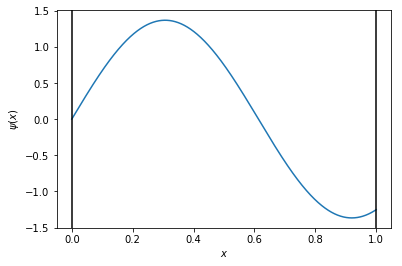

In [10]:
PSI,X = intNumerov(E=1.0)
plt.plot(X,PSI)
plt.axvline(x=0,color='k')
plt.axvline(x=L,color='k')
plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.show()

In [5]:
# Energías teóricas
# Esto para definir los intervalos de bisección
Eteo = []
for i in range(1,6):
    En = hbar**2.*np.pi**2*i**2/(2.*m*L**2.)
    print('n:',i,'E:',En)
    Eteo.append(En)


n: 1 E: 0.3760279041829298
n: 2 E: 1.5041116167317192
n: 3 E: 3.384251137646368
n: 4 E: 6.016446466926877
n: 5 E: 9.400697604573244


In [6]:
E1=Biseccion(Frontera,0.2,0.5)
E2=Biseccion(Frontera,1.,2.)
E3=Biseccion(Frontera,2.,4.)
E4=Biseccion(Frontera,5.,7.)
E5=Biseccion(Frontera,8.,10.)


Enum = np.array([E1,E2,E3,E4,E5])
for i in range(len(Enum)):
    Error = abs((Enum[i]-Eteo[i])/Eteo[i])
    print('Numérico:%11.8f'%Enum[i],'Teórico:%11.8f'%Eteo[i],'Error:%e'%Error)

Numérico: 0.37602794 Teórico: 0.37602790 Error:9.978213e-08
Numérico: 1.50411159 Teórico: 1.50411162 Error:1.910129e-08
Numérico: 3.38425118 Teórico: 3.38425114 Error:1.172034e-08
Numérico: 6.01644641 Teórico: 6.01644647 Error:9.194335e-09
Numérico: 9.40069765 Teórico: 9.40069760 Error:4.675397e-09


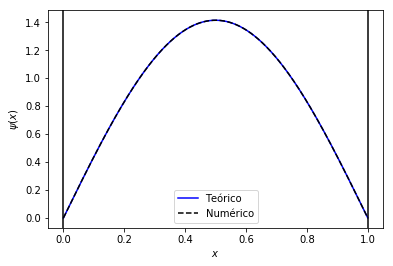

In [7]:
PSI,X = intNumerov(E1)
PsiTeo = np.sqrt(2./L)*np.sin(np.pi*np.array(X)/L)
plt.plot(X,PsiTeo,'b',label='Teórico')
plt.plot(X,PSI,'k--',label = 'Numérico')
plt.axvline(x=0,color='k')
plt.axvline(x=L,color='k')
plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.legend()
plt.show()

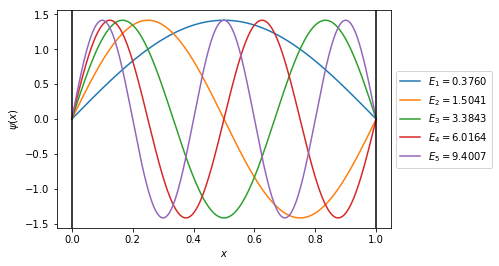

In [8]:
for i in range(len(Enum)):
    PSI,X = intNumerov(Enum[i])
    plt.plot(X,PSI,label = r'$E_%i = %7.4f$'%((i+1),Enum[i]))
    
plt.xlabel('$x$')
plt.ylabel('$\psi(x)$')
plt.axvline(x=0,color='k')
plt.axvline(x=L,color='k')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()